In [4]:
sc

In [5]:
# Import all libraries 
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf
from pyspark.sql import Window
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
spark=SparkSession.builder.appName('Coursework').getOrCreate()
sqlContext.sql("set spark.sql.shuffle.partitions=20")

DataFrame[key: string, value: string]

In [6]:
#Creates Spark Data Frame 
spark = SparkSession.builder.appName('Coureswork').getOrCreate()
df1=spark.read.csv('meets.csv', mode="DROPMALFORMED",inferSchema=True, header = True)
df2=spark.read.csv('openpowerlifting.csv', mode="DROPMALFORMED",inferSchema=True, header = True)
#Shows the first 5 of the meets.csv
df1.show(5)

+------+--------------+----------+--------------------+-----------+---------+---------+--------------------+
|MeetID|      MeetPath|Federation|                Date|MeetCountry|MeetState| MeetTown|            MeetName|
+------+--------------+----------+--------------------+-----------+---------+---------+--------------------+
|     0|365strong/1601| 365Strong|2016-10-29 00:00:...|        USA|       NC|Charlotte|2016 Junior & Sen...|
|     1|365strong/1602| 365Strong|2016-11-19 00:00:...|        USA|       MO|    Ozark|Thanksgiving Powe...|
|     2|365strong/1603| 365Strong|2016-07-09 00:00:...|        USA|       NC|Charlotte|Charlotte Europa ...|
|     3|365strong/1604| 365Strong|2016-06-11 00:00:...|        USA|       SC|Rock Hill|Carolina Cup Push...|
|     4|365strong/1605| 365Strong|2016-04-10 00:00:...|        USA|       SC|Rock Hill|Eastern USA Chall...|
+------+--------------+----------+--------------------+-----------+---------+---------+--------------------+
only showing top 5 

In [7]:
#Shows the first 5 of the openpowerlifting.csv
df2.show(5)

+------+----------------+---+----------+----+-----------+------------+-------------+--------+-----------+--------+-----------+-----------+--------------+-------+-----+------+
|MeetID|            Name|Sex| Equipment| Age|   Division|BodyweightKg|WeightClassKg|Squat4Kg|BestSquatKg|Bench4Kg|BestBenchKg|Deadlift4Kg|BestDeadliftKg|TotalKg|Place| Wilks|
+------+----------------+---+----------+----+-----------+------------+-------------+--------+-----------+--------+-----------+-----------+--------------+-------+-----+------+
|     0|Angie Belk Terry|  F|     Wraps|47.0|  Mst 45-49|        59.6|           60|    null|      47.63|    null|      20.41|       null|         70.31| 138.35|    1|155.05|
|     0|     Dawn Bogart|  F|Single-ply|42.0|  Mst 40-44|       58.51|           60|    null|     142.88|    null|      95.25|       null|        163.29| 401.42|    1|456.38|
|     0|     Dawn Bogart|  F|Single-ply|42.0|Open Senior|       58.51|           60|    null|     142.88|    null|      95.25

In [8]:
#Counts the number of data entries within meets.csv
print((df1.count()))

8482


In [9]:
#Counts the number of data entries within openpowerlifting.csv
print((df2.count()))

386414


In [10]:
# Show All Columns in Meets CSV File
df1.columns

['MeetID',
 'MeetPath',
 'Federation',
 'Date',
 'MeetCountry',
 'MeetState',
 'MeetTown',
 'MeetName']

In [11]:
# Show All Columns in openpowerlifting CSV File
df2.columns

['MeetID',
 'Name',
 'Sex',
 'Equipment',
 'Age',
 'Division',
 'BodyweightKg',
 'WeightClassKg',
 'Squat4Kg',
 'BestSquatKg',
 'Bench4Kg',
 'BestBenchKg',
 'Deadlift4Kg',
 'BestDeadliftKg',
 'TotalKg',
 'Place',
 'Wilks']

In [12]:
#Dropping columns that are not needed
df1 = df1.drop("Date", "MeetTown", "MeetState","MeetPath", "Federation","MeetName")
df1.show(5)

+------+-----------+
|MeetID|MeetCountry|
+------+-----------+
|     0|        USA|
|     1|        USA|
|     2|        USA|
|     3|        USA|
|     4|        USA|
+------+-----------+
only showing top 5 rows



In [13]:
#Dropping columns that are not needed
df2 = df2.drop("Squat4kg", "Bench4kg", "Deadlift4kg","Wilks", "Division")
df2.show(5)

+------+----------------+---+----------+----+------------+-------------+-----------+-----------+--------------+-------+-----+
|MeetID|            Name|Sex| Equipment| Age|BodyweightKg|WeightClassKg|BestSquatKg|BestBenchKg|BestDeadliftKg|TotalKg|Place|
+------+----------------+---+----------+----+------------+-------------+-----------+-----------+--------------+-------+-----+
|     0|Angie Belk Terry|  F|     Wraps|47.0|        59.6|           60|      47.63|      20.41|         70.31| 138.35|    1|
|     0|     Dawn Bogart|  F|Single-ply|42.0|       58.51|           60|     142.88|      95.25|        163.29| 401.42|    1|
|     0|     Dawn Bogart|  F|Single-ply|42.0|       58.51|           60|     142.88|      95.25|        163.29| 401.42|    1|
|     0|     Dawn Bogart|  F|       Raw|42.0|       58.51|           60|       null|      95.25|          null|  95.25|    1|
|     0|    Destiny Dula|  F|       Raw|18.0|       63.68|         67.5|       null|      31.75|         90.72| 122.47

In [14]:
#joining df1 to df2 to create join 
#This is done by joining MeetID 
join=df1.join(df2,'MeetID', how='inner')
join.printSchema()

root
 |-- MeetID: integer (nullable = true)
 |-- MeetCountry: string (nullable = true)
 |-- Name: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Equipment: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- BodyweightKg: double (nullable = true)
 |-- WeightClassKg: string (nullable = true)
 |-- BestSquatKg: double (nullable = true)
 |-- BestBenchKg: double (nullable = true)
 |-- BestDeadliftKg: double (nullable = true)
 |-- TotalKg: double (nullable = true)
 |-- Place: string (nullable = true)



In [15]:
#This function below shows the number of missing values within the dataset
from pyspark.sql.functions import *
join.select([count(when(col(c).isNull(), c)).alias(c) for c in join.columns]).show()

+------+-----------+----+---+---------+------+------------+-------------+-----------+-----------+--------------+-------+-----+
|MeetID|MeetCountry|Name|Sex|Equipment|   Age|BodyweightKg|WeightClassKg|BestSquatKg|BestBenchKg|BestDeadliftKg|TotalKg|Place|
+------+-----------+----+---+---------+------+------------+-------------+-----------+-----------+--------------+-------+-----+
|     0|          0|   0|  0|        0|239267|        2402|         3812|      88343|      30050|         68567|  23177| 1092|
+------+-----------+----+---+---------+------+------------+-------------+-----------+-----------+--------------+-------+-----+



In [16]:
#Removes any Null Values
from functools import reduce
join.filter(~reduce(lambda x, y: x & y, [join[c].isNull() for c in join.columns])).show(5)

+------+-----------+----------------+---+----------+----+------------+-------------+-----------+-----------+--------------+-------+-----+
|MeetID|MeetCountry|            Name|Sex| Equipment| Age|BodyweightKg|WeightClassKg|BestSquatKg|BestBenchKg|BestDeadliftKg|TotalKg|Place|
+------+-----------+----------------+---+----------+----+------------+-------------+-----------+-----------+--------------+-------+-----+
|     0|        USA|Angie Belk Terry|  F|     Wraps|47.0|        59.6|           60|      47.63|      20.41|         70.31| 138.35|    1|
|     0|        USA|     Dawn Bogart|  F|Single-ply|42.0|       58.51|           60|     142.88|      95.25|        163.29| 401.42|    1|
|     0|        USA|     Dawn Bogart|  F|Single-ply|42.0|       58.51|           60|     142.88|      95.25|        163.29| 401.42|    1|
|     0|        USA|     Dawn Bogart|  F|       Raw|42.0|       58.51|           60|       null|      95.25|          null|  95.25|    1|
|     0|        USA|    Destiny Du

In [17]:
#Removes all null values
join.na.drop(how="all").show(5)

+------+-----------+----------------+---+----------+----+------------+-------------+-----------+-----------+--------------+-------+-----+
|MeetID|MeetCountry|            Name|Sex| Equipment| Age|BodyweightKg|WeightClassKg|BestSquatKg|BestBenchKg|BestDeadliftKg|TotalKg|Place|
+------+-----------+----------------+---+----------+----+------------+-------------+-----------+-----------+--------------+-------+-----+
|     0|        USA|Angie Belk Terry|  F|     Wraps|47.0|        59.6|           60|      47.63|      20.41|         70.31| 138.35|    1|
|     0|        USA|     Dawn Bogart|  F|Single-ply|42.0|       58.51|           60|     142.88|      95.25|        163.29| 401.42|    1|
|     0|        USA|     Dawn Bogart|  F|Single-ply|42.0|       58.51|           60|     142.88|      95.25|        163.29| 401.42|    1|
|     0|        USA|     Dawn Bogart|  F|       Raw|42.0|       58.51|           60|       null|      95.25|          null|  95.25|    1|
|     0|        USA|    Destiny Du

In [18]:
#Drops any Duplicates after the join
join.dropDuplicates().show(5)

+------+-----------+--------------+---+---------+----+------------+-------------+-----------+-----------+--------------+-------+-----+
|MeetID|MeetCountry|          Name|Sex|Equipment| Age|BodyweightKg|WeightClassKg|BestSquatKg|BestBenchKg|BestDeadliftKg|TotalKg|Place|
+------+-----------+--------------+---+---------+----+------------+-------------+-----------+-----------+--------------+-------+-----+
|     0|        USA|Danielle Ortiz|  F|      Raw|17.0|       69.31|           75|      81.65|       49.9|        115.67| 247.22|    1|
|     0|        USA|Shane Langston|  M|    Wraps|32.0|       99.79|          100|     263.08|     185.97|        301.64| 750.69|    1|
|     0|        USA|    Gage Mason|  M|      Raw|25.0|      116.21|          125|       null|     158.76|          null| 158.76|    3|
|     0|        USA|  Chris Senter|  M|      Raw|51.0|      131.18|          140|       null|     206.38|          null| 206.38|    1|
|     0|        USA|  Jerod Dawson|  M|      Raw|40.0| 

In [19]:
#An aggeration Query that filters and counts the average total between the two genders
from pyspark.sql import functions as F
df2.groupBy("Sex").agg(F.mean('TotalKg'), F.count('TotalKg')).show()

+---+------------------+--------------+
|Sex|      avg(TotalKg)|count(TotalKg)|
+---+------------------+--------------+
|  F|277.60962261246556|         84449|
|  M|468.34413041452467|        278788|
+---+------------------+--------------+



In [20]:
#Loading Phase of the Data Pipeline, that loads the transfrmed data into MongoDB using PyMongo
join.write.format("com.mongodb.spark.sql.DefaultSource") \
.mode("append") \
.option("database","test") \
.option("collection", "join").save()
#Using Pymongo
import pymongo
from pymongo import MongoClient
client = MongoClient()
import pandas
result = client.test.join.find()
result_df=pandas.DataFrame(list(result))
result_df

,Age,BestBenchKg,BestDeadliftKg,BestSquatKg,BodyweightKg,Equipment,MeetCountry,MeetID,Name,Place,Sex,TotalKg,WeightClassKg,_id
0,47.0,20.41,70.31,47.63,59.60,Wraps,USA,0,Angie Belk Terry,1,F,138.35,60,5ccc53bde88b100cbf7d0a98
1,42.0,95.25,163.29,142.88,58.51,Single-ply,USA,0,Dawn Bogart,1,F,401.42,60,5ccc53bde88b100cbf7d0a99
2,42.0,95.25,163.29,142.88,58.51,Single-ply,USA,0,Dawn Bogart,1,F,401.42,60,5ccc53bde88b100cbf7d0a9a
3,42.0,95.25,NaN,NaN,58.51,Raw,USA,0,Dawn Bogart,1,F,95.25,60,5ccc53bde88b100cbf7d0a9b
4,18.0,31.75,90.72,NaN,63.68,Raw,USA,0,Destiny Dula,1,F,122.47,67.5,5ccc53bde88b100cbf7d0a9c
5,28.0,77.11,145.15,170.10,62.41,Wraps,USA,0,Courtney Norris,1,F,392.36,67.5,5ccc53bde88b100cbf7d0a9d
6,60.0,95.25,163.29,124.74,67.31,Raw,USA,0,Maureen Clary,1,F,383.28,67.5,5ccc53bde88b100cbf7d0a9e
7,60.0,95.25,163.29,124.74,67.31,Raw,USA,0,Maureen Clary,1,F,383.28,67.5,5ccc53bde88b100cbf7d0a9f
8,52.0,54.43,108.86,120.20,65.95,Wraps,USA,0,Priscilla Sweat Pardue,1,F,283.49,67.5,5ccc53bde88b100cbf7d0aa0
9,52.0,NaN,108.86,NaN,65.95,Raw,USA,0,Priscilla Sweat Pardue,1,F,108.86,67.5,5ccc53bde88b100cbf7d0aa1


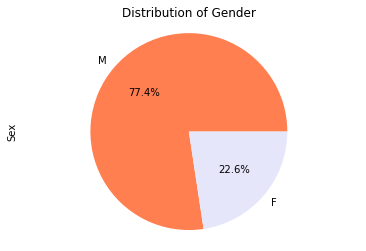

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

#Plot a Pie Chart of Gender Distrbution
result_df.Sex.value_counts().plot(kind='pie', autopct ='%1.1f%%', colors = ['coral','lavender'])
plt.axis('equal')
plt.title('Distribution of Gender')

In [23]:
def weight_calculate(x):
    if(x < 10.0):
        return "05-10"
    if(x >= 10.0 and x < 20.0):
        return "10-20"
    if(x >= 20.0 and x < 30.0):
        return "20-30"
    if(x >= 30.0 and x < 40.0):
        return "30-40"
    if(x >= 40.0 and x < 50.0):
        return "40-50"
    if(x >= 50.0 and x < 60.0):
        return "50-60"
    if(x >= 60.0 and x < 70.0):
        return "60-70"
    if(x >= 70.0 and x < 80.0):
        return "70-80"
    if(x >= 80.0 and x < 90.0):
        return "80-90"
    else:
        return "90-100"
    


result_df['WeightClassKg'] = pd.DataFrame(result_df.BodyweightKg.apply(lambda x : weight_calculate(x)))

In [24]:
Md = pd.DataFrame(result_df[result_df['Sex'] == 'M'])
Fd = pd.DataFrame(result_df[result_df['Sex'] == 'F'])
LiftsMen = pd.DataFrame(Md.groupby('WeightClassKg')[['BestSquatKg','BestBenchKg','BestDeadliftKg']].mean()).reset_index()
LiftsWomen = pd.DataFrame(Fd.groupby('WeightClassKg')[['BestSquatKg','BestBenchKg','BestDeadliftKg']].mean()).reset_index()

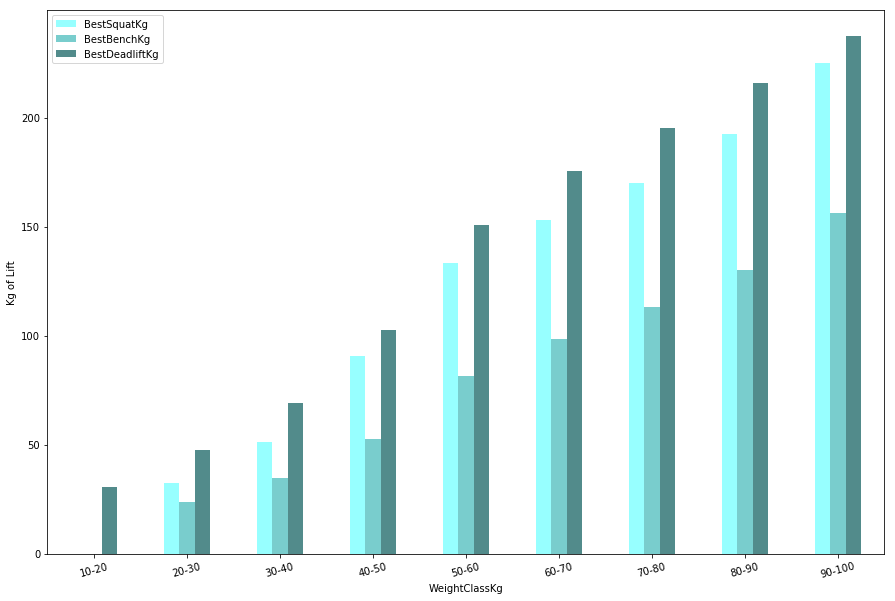

In [30]:
#plt.figure(figsize = (20,10))
LiftsMen.plot(kind = 'bar', color = ['#97FFFF','#79CDCD','#528B8B'], figsize = (15,10), x = 'WeightClassKg', rot = 15)
plt.ylabel('Kg of Lift')

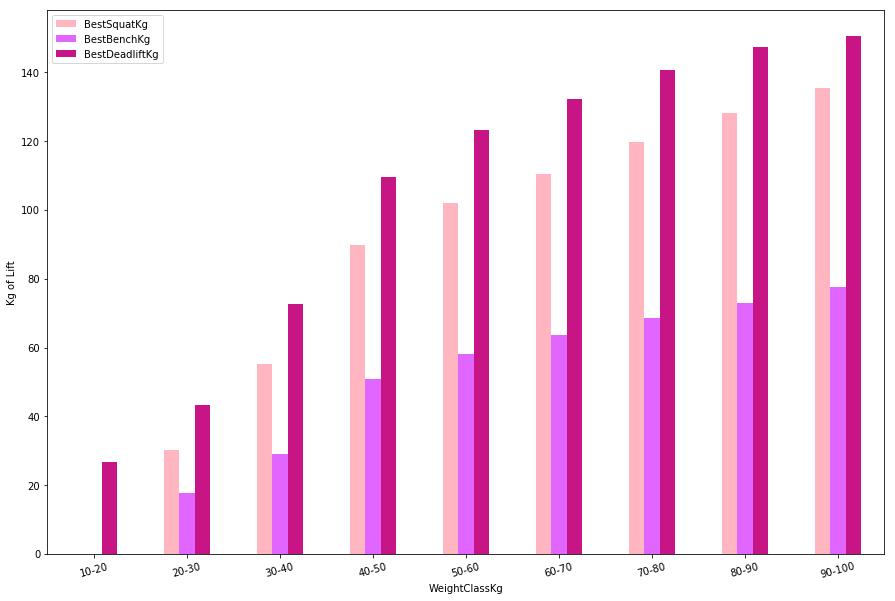

In [31]:
#plt.figure(figsize = (20,10))
LiftsWomen.plot(kind = 'bar', color = ['#FFB6C1','#E066FF','#C71585'], figsize = (15,10), x = 'WeightClassKg', rot = 15)
plt.ylabel('Kg of Lift')